## General utility functions and variables

In [1]:
#import ipyparallel
#ipyclient = ipyparallel.Client()
import matplotlib.pyplot
%matplotlib inline

In [18]:
def setup():
    import sys
    import os
    sys.path.append(os.getcwd())

ipyclient[:].apply_sync(setup)
    
with ipyclient[:].sync_imports(local=True):
    import simulation_utils
    import sys
    import numpy
    import matplotlib.pyplot
    import subprocess
    import networkx
    import os
    import shutil
    import yaml
    import ipyparallel
    from networkx import __version__ as networkxversion

print('networkx: '+networkxversion)

NameError: name 'ipyclient' is not defined

In [5]:
import simulation_utils as su
import sys
import numpy
import matplotlib.pyplot
import subprocess
import networkx
import os
import shutil
import yaml
import ipyparallel
from networkx import __version__ as networkxversion

# Figure 2

## 2a
The x-axis is the number of trees (or landmarks) used, and the y-axis is the ratio of successfully routed transaction to total transactions. Each point on the plot is the value of CREDIT_NETWORK_SUCCESS in _singles.txt for the run with that many trees. All of these runs use 2 attempts.

### Run simulations

In [23]:
attempts = 1
transaction_set = 0
attack = 1
no_attack = 0
for tree in range(1, max_trees+1):
    run_static(transaction_set, silentwhispers, attempts, tree, no_attack)
    run_static(transaction_set, speedymurmurs, attempts, tree, attack, force=True)
print('Done.')

Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 1 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 2 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 3 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 4 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 5 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 6 1
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 1 7 1


### Generate plots from data

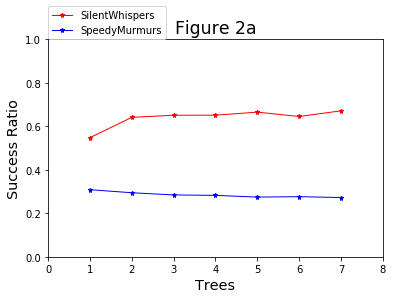

In [25]:
attempts = 1
key = 'CREDIT_NETWORK_SUCCESS'
silentwhispers_data = extract_from_singles(silentwhispers, attempts, max_trees, key)
speedymurmurs_data = extract_from_singles(speedymurmurs, attempts, max_trees, key)

matplotlib.pyplot.figure()
matplotlib.pyplot.title('Figure 2a', size='xx-large')
matplotlib.pyplot.ylabel('Success Ratio', size='x-large')
matplotlib.pyplot.xlabel('Trees', size='x-large')
matplotlib.pyplot.axis([0,8,0.0,1.0])

matplotlib.pyplot.plot(range(1,max_trees+1), silentwhispers_data, 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
matplotlib.pyplot.plot(range(1,max_trees+1), speedymurmurs_data, 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)


## 2b
The x-axis is the number of trees (or landmarks) used, and the y-axis is the number of hops a transaction took to reach its destination. Each point on the plot is the value of CREDIT_NETWORK_DELAY_AV in _singles.txt for the run with that many trees. All of these runs use 2 attempts.

Same simulations as 2a.


### Generate plots from data

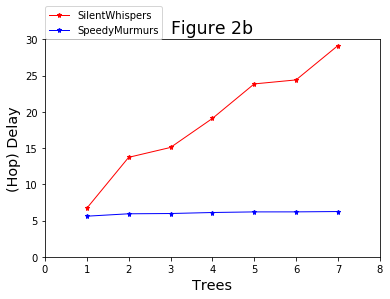

In [21]:
attempts = 1
key = 'CREDIT_NETWORK_DELAY_AV'
silentwhispers_data = extract_from_singles(silentwhispers, attempts, max_trees, key)
speedymurmurs_data = extract_from_singles(speedymurmurs, attempts, max_trees, key)

matplotlib.pyplot.figure()
matplotlib.pyplot.title('Figure 2b', size='xx-large')
matplotlib.pyplot.ylabel('(Hop) Delay', size='x-large')
matplotlib.pyplot.xlabel('Trees', size='x-large')
matplotlib.pyplot.axis([0,8,0,30])

matplotlib.pyplot.plot(range(1,max_trees+1), silentwhispers_data, 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
matplotlib.pyplot.plot(range(1,max_trees+1), speedymurmurs_data, 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)


## 2c
The x-axis is the number of times a failed transaction should be retried, and the y-axis is the ratio of successfully routed transaction to total transactions. Each point on the plot is the value of CREDIT_NETWORK_SUCCESS in \_singles.txt for the run with that many retries. All of these runs use 3 landmarks.

### Run simulations

In [ ]:
trees = 3
transaction_set = 0
for attempt in range(1, max_attempts+1):
    run_static(transaction_set, silentwhispers, attempt, trees)
    run_static(transaction_set, speedymurmurs, attempt, trees)
print('Done.')  
    

Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Static 0 7 8 3


### Generate plots from data

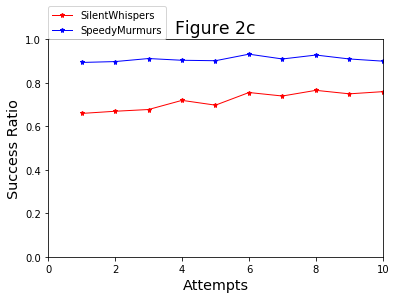

In [23]:
trees = 3
key = 'CREDIT_NETWORK_SUCCESS'
silentwhispers_data = extract_from_singles_attempts(silentwhispers, max_attempts, trees, key)
speedymurmurs_data = extract_from_singles_attempts(speedymurmurs, max_attempts, trees, key)

matplotlib.pyplot.figure()
matplotlib.pyplot.title('Figure 2c', size='xx-large')
matplotlib.pyplot.ylabel('Success Ratio', size='x-large')
matplotlib.pyplot.xlabel('Attempts', size='x-large')
matplotlib.pyplot.axis([0,10,0.0,1.0])

matplotlib.pyplot.plot(range(1,max_attempts+1), silentwhispers_data, 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
matplotlib.pyplot.plot(range(1,max_attempts+1), speedymurmurs_data, 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)


## Figure 3 Plots

## 3a
This is generated from the Ripple transaction data set, not from the simulator. The x-axis is the epoch number with epochs being of length 1000\*delta\_av, where delta\_av is calculated from the data set as the average time between two subsequent transactions. The y-axis is either the number of transactions or the number of transactions or link changes in that epoch. The number of transactions are determined by counting lines in the ripple transaction data set (for the epoch in question), and the link changes are determined by counting the number of lines in the newlinks data set (jan2013-newlinks-lcc-sorted-uniq-t\*.txt) for the epoch in question.

### Generate plots from data

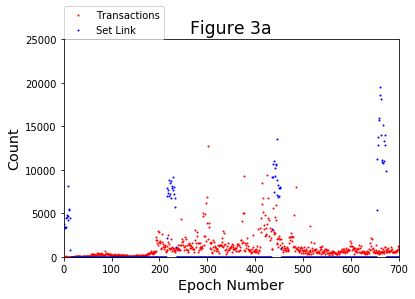

In [8]:
transactions_file = '../data/finalSets/dynamic/jan2013-trans-lcc-noself-uniq-{0}.txt'
link_changes_file = '../data/finalSets/dynamic/jan2013-newlinks-lcc-sorted-uniq-t{0}.txt'
epoch_length, transactions = get_epoch_length(transactions_file)
link_changes = read_link_changes_files(link_changes_file)


transactions_per_epoch = calculate_events_per_epoch(epoch_length, transactions)
link_changes_per_epoch = calculate_events_per_epoch(epoch_length, link_changes)
lc_per_epoch_list = dict_to_list(link_changes_per_epoch, 801)

matplotlib.pyplot.figure()
matplotlib.pyplot.title('Figure 3a', size='xx-large')
matplotlib.pyplot.ylabel('Count', size='x-large')
matplotlib.pyplot.xlabel('Epoch Number', size='x-large')
matplotlib.pyplot.axis([0,700,0,25000])

matplotlib.pyplot.plot(range(1, 801), transactions_per_epoch.values(), 'ro', markersize=1, linewidth=1, label='Transactions')
matplotlib.pyplot.plot(range(1, 801), lc_per_epoch_list, 'bo', markersize=1, linewidth=1, label='Set Link')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)


## 3b
The x-axis is the epoch number with epochs calculated as above. The y-axis is the number of stabilization messages for that epoch. The number of stabilization messages can be determined from the cnet-stab.txt file which tracks stabilization messages per epoch. All of these runs use 2 attempts and 3 landmarks.

### Run simulations

In [99]:
for step in range(0,9):
    run_dynamic(0, silentwhispers, 2, 3, step)
    run_dynamic(0, speedymurmurs, 2, 3, step)
print('Done.')

Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 7 7
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 7 8
Done.


### Generate plots from data

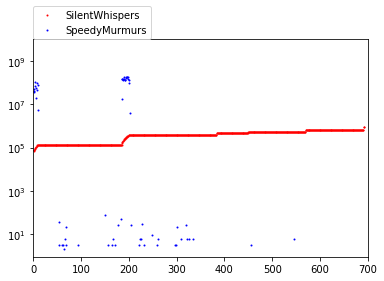

In [106]:
stab_file = '/cnet-stab.txt'

sw_stab_messages_list = []
sm_stab_messages_list = []
sw_stab_messages_dict = {}
sm_stab_messages_dict = {}
for step in range(0,9):
    sw_file_path = get_dynamic_data_path(silentwhispers, 3, 2, step) + stab_file
    sm_file_path = get_dynamic_data_path(speedymurmurs, 3, 2, step) + stab_file

    # create dict of stab message values for both sw and sm
    new_dict_sw = convert_kv_file_to_dict(sw_file_path)
    new_dict_sm = convert_kv_file_to_dict(sm_file_path)

    sw_stab_messages_dict = merge_dicts(new_dict_sw, sw_stab_messages_dict)
    sm_stab_messages_dict = merge_dicts(new_dict_sm, sm_stab_messages_dict)

sw_stab_messages_list = dict_to_list(sw_stab_messages_dict, 801)
sm_stab_messages_list = dict_to_list(sm_stab_messages_dict, 801)

matplotlib.pyplot.yscale('log')
matplotlib.pyplot.axis([0,700,0,1e+10])
matplotlib.pyplot.plot(range(1, 801), sw_stab_messages_list, 'ro', markersize=1, linewidth=1, label='SilentWhispers')
matplotlib.pyplot.plot(range(1, 801), sm_stab_messages_list, 'bo', markersize=1, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)

## 3c
The x-axis is the epoch number with epochs calculated as above. The y-axis is the ratio of the success rate of SpeedyMurmurs or SilentWhispers to the success rate of Ford-Fulkerson. The lines in the plot are represented as a moving average over 50 epochs. All of these runs use 2 attempts and 3 landmarks.

### Run simulations

In [100]:
for step in range(0,9):
    run_dynamic(0, silentwhispers, 2, 3, step)
    run_dynamic(0, speedymurmurs, 2, 3, step)
    run_dynamic(0, maxflow, 2, 3, step)
print('Done.')

Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 1
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 2
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 3
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 4
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 5
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 6
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 7
Run exists. Skipping...
Run exists. Skipping...
Running: java -cp bin/ treeembedding.tests.Dynamic 0 10 8
Done.


### Generate plots from data

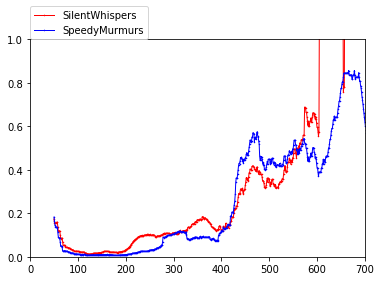

In [113]:
filename = '/cnet-succR.txt'

sw_succr_list = []
sm_succr_list = []
sw_succr_dict = {}
sm_succr_dict = {}
m_succr_dict = {}
for step in range(0, 9):
    m_file_path = get_dynamic_data_path(maxflow, 3, 2, step) + filename
    sw_file_path = get_dynamic_data_path(silentwhispers, 3, 2, step) + filename
    sm_file_path = get_dynamic_data_path(speedymurmurs, 3, 2, step) + filename

    # get succR for SW for each epoch
    sw_new_dict = convert_kv_file_to_dict(sw_file_path)
    sm_new_dict = convert_kv_file_to_dict(sm_file_path)
    m_new_dict = convert_kv_file_to_dict(m_file_path)
    
    sw_succr_dict = merge_dicts(sw_new_dict, sw_succr_dict)
    sm_succr_dict = merge_dicts(sm_new_dict, sm_succr_dict)
    m_succr_dict = merge_dicts(m_new_dict, m_succr_dict)

# update SW dict by dividing each value by the corresponding value in the M dict
for k,v in sw_succr_dict.items():
    if k in m_succr_dict:
        if m_succr_dict[k] == 0:
            sw_succr_dict[k] = 1
        else:
            sw_succr_dict[k] = v/m_succr_dict[k]

# update SM dict by dividing each value by the corresponding value in the M dict
for k,v in sm_succr_dict.items():
    if k in m_succr_dict:
        if m_succr_dict[k] == 0:
            sm_succr_dict[k] = 1
        else:
            sm_succr_dict[k] = v/m_succr_dict[k]

sw_succr_list = dict_to_list(sw_succr_dict, 801)
sm_succr_list = dict_to_list(sm_succr_dict, 801)

matplotlib.pyplot.axis([0,700,0,1])
matplotlib.pyplot.plot(range(50, 801), running_mean(sw_succr_list, 50), 'r*-', markersize=1, linewidth=1, label='SilentWhispers')

matplotlib.pyplot.plot(range(50, 801), running_mean(sm_succr_list, 50), 'b*-', markersize=1, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,1), scatterpoints=10)



# Plot topology

## Define graph

In [9]:
topology_file = '../data/finalSets/static/ripple-lcc.graph'

G = read_graph_file(topology_file)

Skipping metadata, line: 1
Skipping metadata, line: 2
Skipping metadata, line: 3
Skipping metadata, line: 4
Skipping metadata, line: 5
Skipping metadata, line: 6
Skipping metadata, line: 7
node_id: 0
node_id: 1
node_id: 2
node_id: 3
node_id: 4
node_id: 5
node_id: 6
node_id: 7
Done


# Performance Under Attack

## Success ratio vs. Number of attackers

### Generate list of configurations

In [3]:
import simulation_utils as su
import simulation_common as sc

config_dict_list_srvna_sm = []
config_dict_list_srvna_sw = []
for data_set in range(0, 10):
    for alg in [sc.speedymurmurs, sc.silentwhispers]:
    # for alg in [silentwhispers]:
        for attackers in range(0, 30001, 5000):
        # for attackers in range(30000, 30001, 5000):
            config = f'''
data_set_name: full-{data_set}
base: ../data/finalSets/static
topology: ripple-lcc.graph
link_weights: ripple-lcc.graph_CREDIT_LINKS
transaction_set: sampleTr-{data_set}.txt
simulation_type: static
force_overwrite: false
routing_algorithm: "{alg}"
attempts: 1
trees: 3
attack_properties:
    attackers: {attackers}
    attacker_selection: "random"
    attack_type: drop_all
iterations: 1
concurrent_transactions: False
'''
            if alg == sc.speedymurmurs:
                config_dict_list_srvna_sm.append(sc.parse_config(config))
            elif alg == sc.silentwhispers:
                config_dict_list_srvna_sw.append(sc.parse_config(config))



### Plot results

In [4]:
import matplotlib.pyplot
%matplotlib inline
import simulation_utils as su

key = 'CREDIT_NETWORK_SUCCESS'
static_node_count = 67149

silentwhispers_data = su.extract_from_singles_config_average(config_dict_list_srvna_sw, key, "attack_properties", "attackers")
speedymurmurs_data = su.extract_from_singles_config_average(config_dict_list_srvna_sm, key, "attack_properties", "attackers")

matplotlib.pyplot.figure()
#matplotlib.pyplot.title('Drop Percentage Attack (100% drop rate)', size='xx-large')
matplotlib.pyplot.ylabel('Success Ratio', size='x-large')
matplotlib.pyplot.xlabel('Byzantine Nodes (%)', size='x-large')
matplotlib.pyplot.axis([0,30,0.0,1.0])

%config InlineBackend.figure_format ='retina'
perc = [i/static_node_count*100 for i in range(0,30001, 5000)]
matplotlib.pyplot.plot(perc, silentwhispers_data, 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
matplotlib.pyplot.plot(perc, speedymurmurs_data, 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
matplotlib.pyplot.legend(loc=(0,0), scatterpoints=10)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ben/workspace/credit-networks/speedy-murmurs-simulator/data/static-full-0-silentwhispers-3-1-1/READABLE_FILE_SW-PER-MUL-67149/0/CREDIT_NETWORK-STATIC-1000.0-TREE_ROUTE_SILENTW-false-true-3-2000.0-RANDOM_PARTITIONER-1/_singles.txt'

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import simulation_utils as su
import scipy.stats as ss
import numpy as np

key = 'CREDIT_NETWORK_SUCCESS'
static_node_count = 67149
degrees_of_freedom = 9

silentwhispers_data = su.extract_from_singles_config(config_dict_list_srvna_sw, key, "attack_properties", "attackers")
speedymurmurs_data = su.extract_from_singles_config(config_dict_list_srvna_sm, key, "attack_properties", "attackers")

plt.figure()
#matplotlib.pyplot.title('Drop Percentage Attack (100% drop rate)', size='xx-large')
plt.ylabel('Success Ratio', size='x-large')
plt.xlabel('Byzantine Nodes (%)', size='x-large')
plt.axis([0,30,0.0,1.0])

%config InlineBackend.figure_format ='retina'
perc = [i/static_node_count*100 for i in range(0,30001, 5000)]

silentwhispers_data_avg = su.extract_from_singles_config_average(config_dict_list_srvna_sw, key, "attack_properties", "attackers")
silentwhispers_data_std = su.extract_from_singles_config_stddev(config_dict_list_srvna_sw, key, "attack_properties", "attackers")
data_m_sw=np.array(silentwhispers_data_avg)   #(Means of your data)
data_sd_sw=np.array(silentwhispers_data_std)   #(Standard Deviations of your data)
plt.errorbar(perc, data_m_sw, yerr=ss.t.ppf(0.95, degrees_of_freedom)*data_sd_sw, color='r', label='SilentWhispers', linewidth=1, elinewidth=4)

speedymurmurs_data_avg = su.extract_from_singles_config_average(config_dict_list_srvna_sm, key, "attack_properties", "attackers")
speedymurmurs_data_std = su.extract_from_singles_config_stddev(config_dict_list_srvna_sm, key, "attack_properties", "attackers")
data_m_sm=np.array(speedymurmurs_data_avg)   #(Means of your data)
data_sd_sm=np.array(speedymurmurs_data_std)   #(Standard Deviations of your data)
plt.errorbar(perc, data_m_sm, yerr=ss.t.ppf(0.95, degrees_of_freedom)*data_sd_sm, color='b', label='SpeedyMurmurs', linewidth=1, elinewidth=2)

#plt.xlim((-1,4))

#plt.plot(perc, silentwhispers_data, 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
#plt.plot(perc, speedymurmurs_data, 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
plt.legend(loc=(0,0), scatterpoints=10)

NameError: name 'config_dict_list_srvna_sw' is not defined

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import simulation_utils as su
import simulation_common as sc
import scipy.stats as ss
import numpy as np

def plot_x_vs_y(configs, x, title, axis, xlabel, xbounds, x2=None, ylabel='Success Ratio', y='CREDIT_NETWORK_SUCCESS'):
    buckets = {}

    # sort by routing algo
    for c in configs:
        buckets = su.sort_singles_configs(c, buckets, "routing_algorithm")
    
    # sort again by threads
    for alg in buckets:
        alg_bucket = su.sort_singles_configs(buckets[alg], {}, x, x2)
        buckets[alg] = alg_bucket
    
    # convert dict of dicts to dict of lists
    bucket_list = {}
    for alg in buckets:
        bucket_list[alg] = []
        for thing in buckets[alg]:
            bucket_list[alg].append(buckets[alg][thing])
    
    #print(bucket_list)
    averages = {}
    for alg in bucket_list:
        for config_list_threads in bucket_list[alg]:
            singles = su.parse_static_singles(config_list_threads)
            if alg not in averages:
                averages[alg] = []
            averages[alg].append(su.average_singles(singles, y))

    print(averages)

    plt.figure()
    plt.title(title, size='xx-large')
    plt.ylabel(ylabel, size='x-large')
    plt.xlabel(xlabel, size='x-large')
    plt.axis(axis)

    %config InlineBackend.figure_format ='retina'

    plt.plot(xbounds, averages[sc.silentwhispers], 'r*-', markersize=5, linewidth=1, label='SilentWhispers')
    plt.plot(xbounds, averages[sc.speedymurmurs], 'b*-', markersize=5, linewidth=1, label='SpeedyMurmurs')
    plt.legend(loc=(.64, .85), scatterpoints=10)

# Success rate vs number of concurrent transactions

Data for this is stored in archive-static-full-variable-threads.tar.gz

{'speedymurmurs': [0.46648199999999995, 0.372006, 0.37527199999999994, 0.378018, 0.38068399999999997, 0.382082], 'silentwhispers': [0.523648, 0.464496, 0.462722, 0.459668, 0.4576759999999999, 0.46048399999999995]}


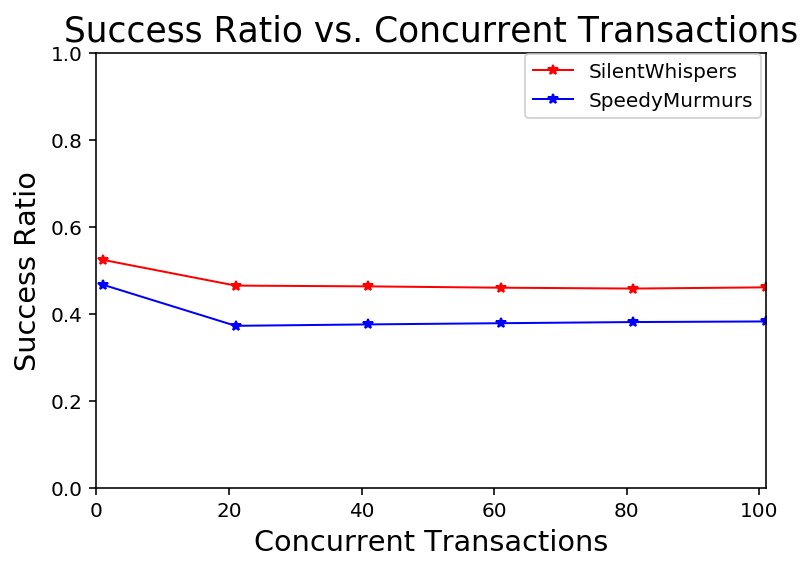

In [11]:
import vary_threads
sb_configs = vary_threads.generate_configs()
plot_x_vs_y(configs=sb_configs, x="concurrent_transactions_count", title='Success Ratio vs. Concurrent Transactions', xlabel='Concurrent Transactions', xbounds=range(1, 102, 20), axis=[0,101,0.0,1.0])

# Success rate vs varying latency

Data for this is stored in archive-static-full-vary-latency.tar.gz

{'speedymurmurs': [0.45, 0.45999999999999996, 0.47000000000000003, 0.4699999999999999, 0.4800000000000001, 0.4699999999999999], 'silentwhispers': [0.38, 0.4000000000000001, 0.39, 0.41, 0.41, 0.19000000000000003]}


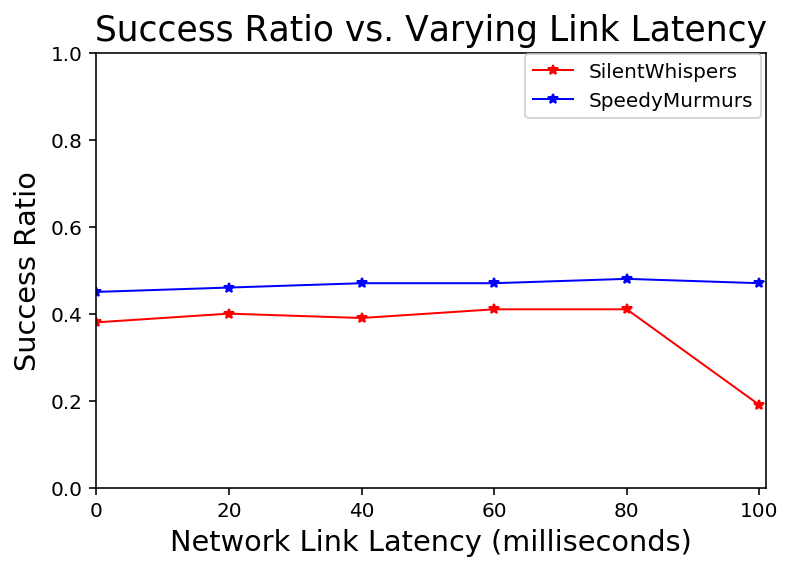

In [9]:
import vary_latency as vl
vl_configs = vl.generate_configs()
plot_x_vs_y(vl_configs, x="network_latency_ms", title='Success Ratio vs. Varying Link Latency', xlabel='Network Link Latency (milliseconds)', xbounds=range(0, 101, 20), axis=[0,101,0.0,1.0])

# Success rate vs varying number of griefing attackers

Data for this is stored in archive-static-full-vary-num-griefing-attackers.tar.gz

In [ ]:
import vary_num_attackers_griefing as va
plot_x_vs_y(va.generate_configs(), x="network_latency_ms", title='Success Ratio vs. Varying Link Latency', xlabel='Network Link Latency (milliseconds)', xbounds=range(0, 101, 20), axis=[0,101,0.0,1.0])

# Success rate vs variable griefing delay

Data for this is stored in archive-static-full-vary-griefing-attack-delay.tar.gz

{'speedymurmurs': [0.44000000000000006, 0.45, 0.48, 0.47000000000000003, 0.48, 0.45999999999999996], 'silentwhispers': [0.41, 0.37, 0.31, 0.33999999999999997, 0.26, 0.25]}


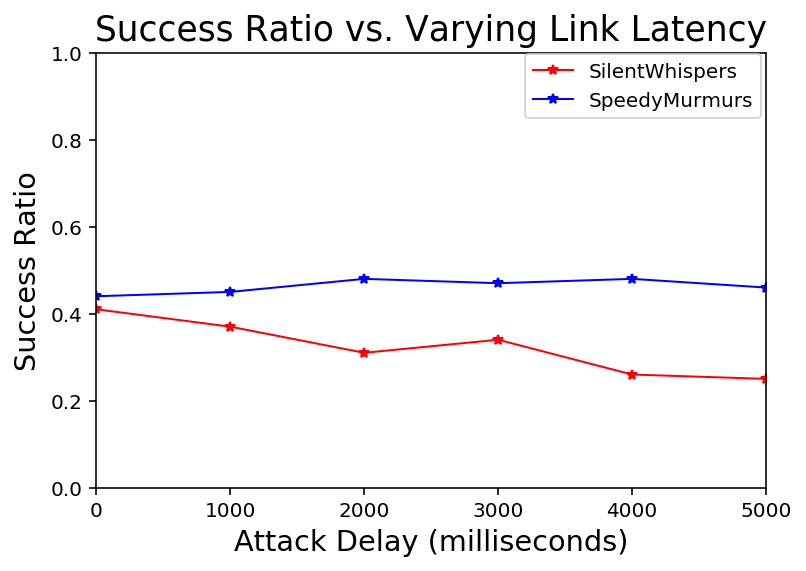

In [2]:
import vary_griefing_attack_delay as vd
plot_x_vs_y(vd.generate_configs(), x="attack_properties", x2="receiver_delay_ms", title='Success Ratio vs. Varying Link Latency', xlabel='Attack Delay (milliseconds)', xbounds=range(0, 5001, 1000), axis=[0,5000,0.0,1.0])